Aikasarjojen esittämisestä Pythonilla

Latasin ensin Valmetin viimeisen kolmen vuoden päätöskurssit ja indeksin OMH Helsinki 25 päätöskurssit vuodesta 1.1.2015 (ks. alla) osoistteesta http://www.nasdaqomxnordic.com.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

Seurataan Aki Taanilan aikasarjojen kuvaamista käsittelevää artikkelia. Avataan tiedostot, lisätään aikaleimat ja järjestetään aikajärjestykseen.

In [19]:
#Avataan tiedostot
valmet = pd.read_csv('http://www.haaga-helia.fi/~fie8lh101/Teaching/2019Kevat/VALMET-2016-03-22-2019-04-19.csv', sep = ';', decimal = ',', usecols = [0,1,2,3,4,5,6,7,8,9,10])
markkinat = pd.read_csv('http://www.haaga-helia.fi/~fie8lh101/Teaching/2019Kevat/OMXH25_2015-01-01-2019-04-22.csv', sep = ';', decimal = ',', usecols = [0,1,2,3])

#Lisätään aikaleimat
valmet.index = pd.to_datetime(valmet['Date'], dayfirst=True)
markkinat.index = pd.to_datetime(markkinat['Date'], dayfirst=True)

#Järjestetään aikasarja vanhimmasta uusimpaan
valmet.sort_index(inplace = True)
markkinat.sort_index(inplace = True)

In [8]:
#Valmetin ensimmäiset rivit
valmet.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
Date,,,,,,,,,,,
2016-03-22,22.3.2016,9.900,9.920,9.83,9.940,9.720,9.925,9.832,317477,3121427.98,1269
2016-03-23,23.3.2016,9.530,9.545,9.54,9.645,9.475,9.525,9.564,232816,2226699.72,1191
2016-03-24,24.3.2016,9.340,9.355,9.45,9.490,9.330,9.350,9.411,246925,2323808.23,1178
2016-03-29,29.3.2016,9.265,9.290,9.36,9.480,9.245,9.285,9.315,190529,1774740.69,954
2016-03-30,30.3.2016,9.780,9.800,9.46,9.850,9.445,9.780,9.747,360987,3518548.34,1600


In [21]:
#Markkinoiden ensimmäiset rivit
markkinat.head()

,Date,High price,Low price,Closing price
Date,,,,
2015-01-02,2.1.2015,3022.43,2993.02,3007.11
2015-01-05,5.1.2015,3023.03,2947.22,2947.53
2015-01-07,7.1.2015,2961.35,2920.84,2929.82
2015-01-08,8.1.2015,2986.39,2952.31,2985.03
2015-01-09,9.1.2015,3001.76,2958.82,2968.38


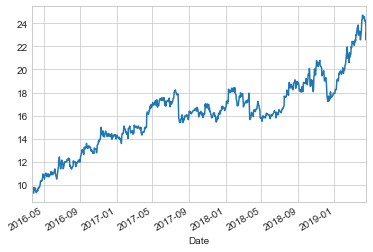

In [11]:
#Piirretään päätöskurssin aikasarjasta viivakuvio
valmet['Closing price'].plot()

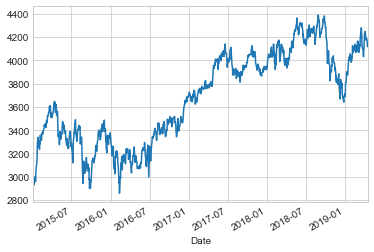

In [20]:
#Piirretään markkinoiden aikasarjasta viivakuvio
markkinat['Closing price'].plot()

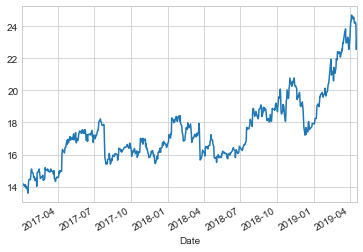

In [25]:
#Tehdään piirrokset vuoden 2017 alusta
valmet['Closing price']['2017-01-01':].plot()

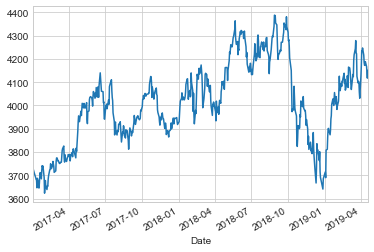

In [26]:
markkinat['Closing price']['2017-01-01':].plot()

Arvot ovat suuruudeltaan aivan eri luokkaa eivätkä ne yhdesä kuvassa näykään. 

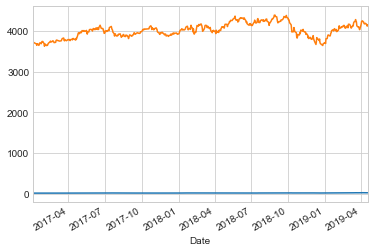

In [27]:
valmet['Closing price']['2017-01-01':].plot()
markkinat['Closing price']['2017-01-01':].plot()

Tehdään kaksi akselia, jotta saadaan eri suuruusluokaltaan olevat asiat samaan kuvaan.

twinx()-funktio luo toisen axes-olion toiselle y-akselille.

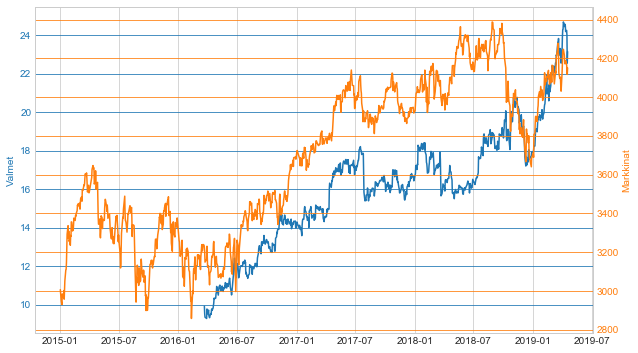

In [40]:
# luodaan figure- ja axes-oliot.
fig1, ax1 = plt.subplots(figsize = (10,6))
                
# Määritetään ax1-olio:
color = 'C0'
ax1.set_ylabel('Valmet', color=color)
ax1.plot(valmet['Closing price'], color=color)
ax1.tick_params(axis='y',labelcolor=color, grid_color=color)

# Luodaan toinen axes-olio, jolla on yhteinen x-akseli ax1-olion kanssa:
ax2 = ax1.twinx()

color = 'C1'
ax2.set_ylabel('Markkinat', color=color)
ax2.plot(markkinat['Closing price'], color=color)
ax2.tick_params(axis='y', labelcolor=color, grid_color=color)

Lasketaan vielä liukuvia keskiarvoja eli tasoitetaan aikasarjan satunnaisia vaihteluja. 

Liukuvat tunnusluvut lasketaan rolling()-funktiolla. Keskiarvo ei ole ainoa tunnusluku, jolle niitä voidaan laskea.

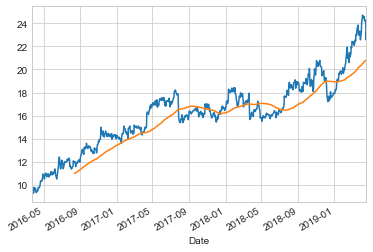

In [41]:
# Piirretään samaan kuvaan kuvio päätöskursseista ja niiden 100:n havainnon liukuvasta keskiarvosta
valmet['Closing price'].plot()
valmet['Closing price'].rolling(100).mean().plot()

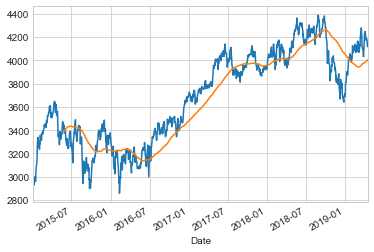

In [42]:
markkinat['Closing price'].plot()
markkinat['Closing price'].rolling(100).mean().plot()

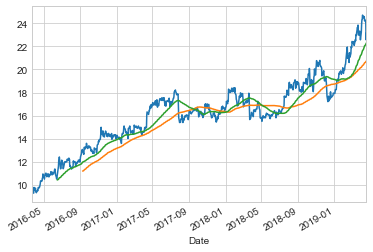

In [43]:
valmet['Closing price'].plot()
valmet['Closing price'].rolling(120).mean().plot()
valmet['Closing price'].rolling(60).mean().plot()

Lasketaan prosenttimuutoksia. 

Tämä tehdään pandas-kirjaston pct_change()-funktiolla.

In [44]:
valmet['Valmet_change'] = valmet['Closing price'].pct_change()
markkinat['Markkinat_change'] = markkinat['Closing price'].pct_change()

Aikasarjojen yhdistäminen samaan dataframeen

Tämä tehdään pandas-kirjaston concat()-funktiolla. Parametri axis määrittää, tehdäänkö yhdistäminen allekkain vai vierekkäin (axis=1).

In [45]:
muutokset = pd.concat([valmet['Valmet_change'], markkinat['Markkinat_change']], axis=1)
muutokset.head()

,Valmet_change,Markkinat_change
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,-0.019813
2015-01-07,NaN,-0.006008
2015-01-08,NaN,0.018844
2015-01-09,NaN,-0.005578


Lasketaan, miten muutokset korreloivat ja piirretään myös liukuvia korrelaatioita.

In [46]:
# Lasketaan, miten muutosprosentit korreloivat:
muutokset.corr()

,Valmet_change,Markkinat_change
Valmet_change,1.00000,0.56477
Markkinat_change,0.56477,1.00000


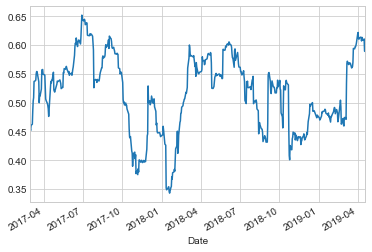

In [55]:
# Liukuva korrelaatio kertoo, miten Valmetin ja Markkinoiden muutosprosentti korreloivat eri aikoina:

korrelaatio=muutokset['Valmet_change'].rolling(90,min_periods=30).corr(muutokset['Markkinat_change'])
korrelaatio['2017-03-01':].plot()

Lasketaan ja piirretään vielä Valmetin ja markkinoiden volatiliteetit. Volatiliteettia käytetään kokonaisriskin mittarina.

Huomaathan, että kaavassa keskihajonta annualisoidaan (kuten asiaan kuuluukin).

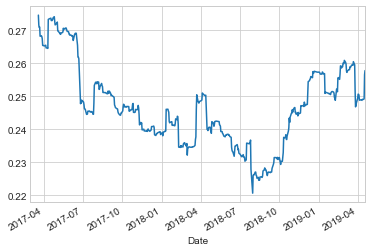

In [54]:
# Lasketaan ja piirretään Valmetin osakkeen volatiliteetti:
(muutokset['Valmet_change'].rolling(252).std()*(252**0.5))['2017-03-01':].plot()

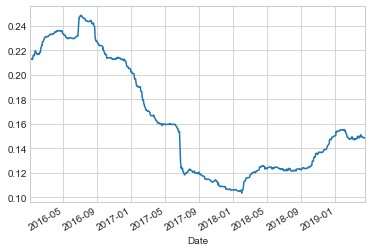

In [52]:
# Lasketaan ja piirretään markkinoiden volatiliteetti:
(muutokset['Markkinat_change'].rolling(252).std()*(252**0.5))['2016-01-01':].plot()